### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data_no_car = data.drop(labels = 'car',axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [7]:
acceptance_rate = data['Y'].mean()
acceptance_percentage = acceptance_rate*100
print(acceptance_percentage)

56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'BarPlot Coupon Column')

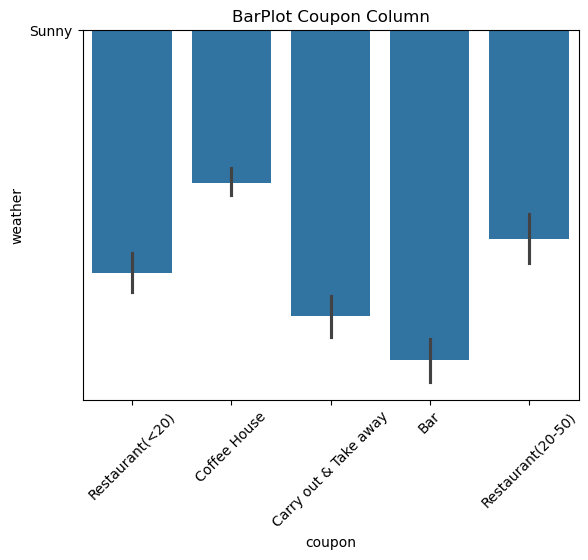

In [9]:
sns.barplot(data, x= 'coupon', y='weather')
plt.xticks(rotation =45)
plt.title('BarPlot Coupon Column')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram Temperature Column')

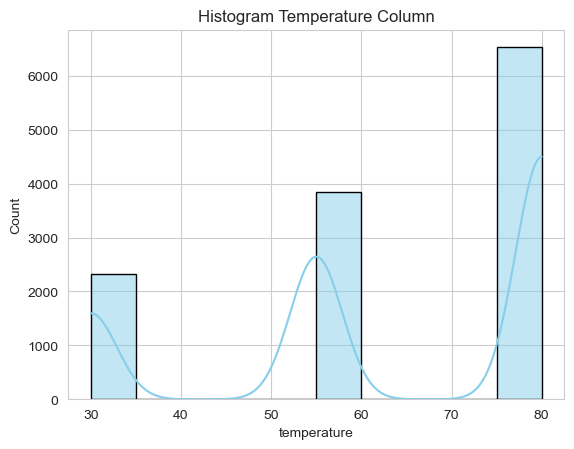

In [11]:
sns.set_style("whitegrid")
sns.histplot(data=data, x = 'temperature',bins=10, kde= True, color='skyblue', edgecolor= 'black')
plt.title('Histogram Temperature Column')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
data_bar_coupons = data[data['coupon'].str.lower()=='bar']
print(data_bar_coupons)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [14]:
acceptance_rate_coupon = data['Y'].mean()
acceptance_percentage_coupon = acceptance_rate_coupon*100
print(acceptance_percentage_coupon)

56.84326710816777


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
low_frequency = ['less1','1-3']
high_frequency= ['4-8', 'gt8']
data_low_freq= data[data['Bar'].isin(low_frequency)]
data_high_freq = data[data['Bar'].isin(high_frequency)]
rate_low = data_low_freq ['Y'].mean()*100
rate_high = data_high_freq['Y'].mean()*100
print(rate_low)
print(rate_high)

56.37564618035612
57.59312320916905


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
high_freq_bar_visits = ['1-3','4-8','gt8']
over_25_age_groups = ['26-30', '31-35', '36-40', '41-45', '46-50', '50plus']
is_target_group =(data['Bar'].isin(high_freq_bar_visits))&(data['age'].isin(over_25_age_groups))
data['Group'] = np.where(is_target_group,'Target Group', 'All Others')
acceptance_rate = data.groupby('Group')['Y'].agg('mean')*100
print(acceptance_rate)

Group
All Others      56.839362
Target Group    59.090909
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:
high_freq_car_visits = ['1-3', '4-8', 'gt8']
not_kid_passanger = ['Spouse', 'Friend', 'None']
excluded_occupations = ['farming', 'fishing', 'forestry']
excluded_occupations = [o.capitalize() for o in excluded_occupations]
is_target_group = (data ['Bar'].isin(high_freq_bar_visits))& (~data['occupation'].isin(excluded_occupations))
data['Group'] = np.where(is_target_group, 'Highly Specific Target', 'All Others')
acceptance_rates = data.groupby('Group')['Y'].mean()*100
print(acceptance_rates)

Group
All Others                56.822051
Highly Specific Target    57.593123
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [20]:
high_freq_bar_visits = ['1-3', '4-8', 'gt8']
not_widowed_status = ['Single', 'Married', 'Divorced']
under_30_age_groups = ['21','26-30']
cheap_restaurants_freq = ['4-8', 'gt8']
low_income_groups = ['Less than $12500', '$12500-$24999', '$25000-$37499']
condition_A = (data['Bar'].isin(high_freq_bar_visits))& (data['passanger'].isin(['Kid']))& (data['maritalStatus'].isin(not_widowed_status))
condition_B = (data['Bar'].isin(high_freq_bar_visits))& (data['age'].isin(under_30_age_groups))
condition_C = (data['RestaurantLessThan20'].isin(cheap_restaurants_freq))& (data['income'].isin(low_income_groups))
is_target_group = condition_A| condition_B| condition_C
data['Group'] = np.where(is_target_group,'Complex Target Group', 'All Others')
acceptance_rates = data.groupby('Group')['Y'].mean()*100
print(acceptance_rates)

Group
All Others              56.622543
Complex Target Group    69.406393
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who already visit bars frequently (more than once a month) are vastly more likely to accept a coupon than those who rarely or never go. 
Age interacts with frequency to create a highly receptive target audience: Drivers over the age 25 who frequently visit bars are the ideal target demographic.
Drivers travelling with adults(spouses or friends), rather than children, are more likely to accept a bar coupon because their immediate social situation is conducting to stooping at a bar.
Drivers with mid-high incomes and specific occupation types (non-farming, forestry jobs, that might be more office-based or urban) show a higher propensity to visit venues like bars.
Conclusion: Drivers who accept bar coupons fit the profile of a typical, frequent bar patron: over the age of 25, social, without children in the car, and already predisposed to visiting bars. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

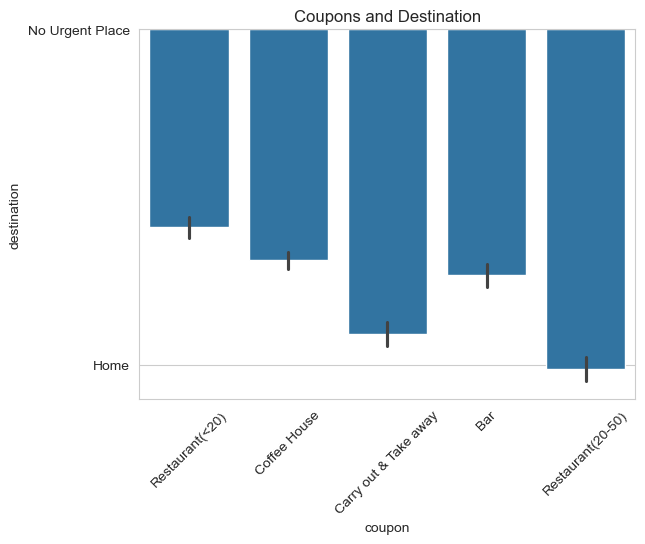

In [26]:
sns.barplot(data,x= "coupon", y ="destination")

plt.title('Coupons and Destination')
plt.xticks(rotation = 45)


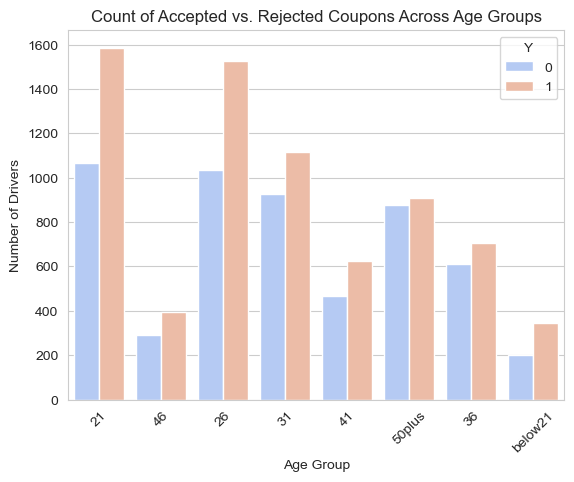

In [29]:


sns.countplot(data=data, x ='age', hue ="Y", palette = 'coolwarm')
plt.title('Count of Accepted vs. Rejected Coupons Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Drivers')
plt.xticks(rotation =45)

plt.show()

Text(0.5, 1.0, 'Coupon, Age and Time ScatterPlot')

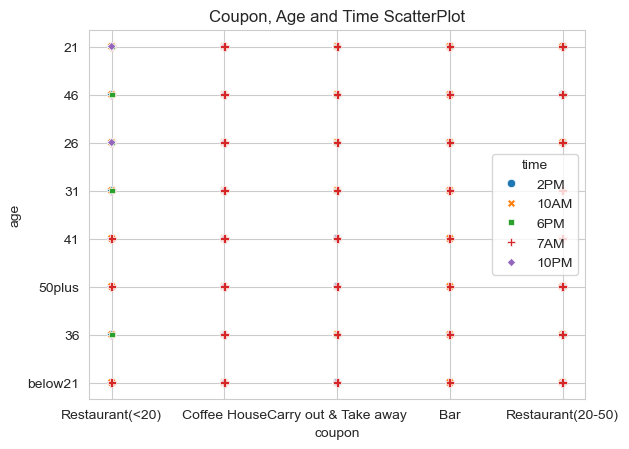

In [31]:
sns.scatterplot(data=data, x='coupon', y='age', hue= 'time', style = 'time')
plt.title('Coupon, Age and Time ScatterPlot')